In [11]:
import os
import numpy as np
import jax.numpy as jnp
from scipy.stats import gaussian_kde
from rsnl.metrics import plot_and_save_coverage
import matplotlib.pyplot as plt
import pickle as pkl

In [12]:
# Set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [13]:
def calculate_coverage(directory, true_param):
    # true_param = jnp.array([0.0])
    # directory = '../res/misspec_ma1/rsnl/'
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    total_coverage = np.zeros(21)
    count_successful = 0
    for sub_dir in sub_dirs:
        try:
            with open(f'{sub_dir}/thetas.pkl', 'rb') as f:
                print('sub_dir: ', sub_dir)
                thetas = jnp.array(pkl.load(f))
                thetas = jnp.concatenate(thetas, axis=0)
                thetas = jnp.transpose(thetas)
                thetas_kernel = thetas[:, ::10]  # THIN BY 10
                # plt.hist(thetas_kernel, bins=30)
                # plt.show()
                thetas_kernel_eval = thetas[:, 1::10]  # THIN BY 10
                kde = gaussian_kde(thetas_kernel, bw_method='silverman')
                true_theta_pdf = kde.logpdf(true_param)
                print('true_theta_pdf: ', true_theta_pdf)
                theta_draws_pdf = kde.logpdf(thetas_kernel_eval)
                theta_draws_pdf = jnp.sort(theta_draws_pdf)[::-1]
                # test_xs = jnp.linspace(0.8, 1.2, 1000)
                # test_ys = kde.logpdf(test_xs)
                # plt.plot(test_xs, test_ys)
                # plt.axvline(x=true_param, color='red')
                # plt.show()
                N = len(theta_draws_pdf)
                print('N: ', N)
                x = jnp.linspace(0, 1, 21)
                indices = round(x * N) - 1
                print('indices: ', indices)
                print('theta_draws_pdf[indices]: ', theta_draws_pdf[indices])
                coverage = theta_draws_pdf[indices] < true_theta_pdf
                coverage = np.array(coverage, dtype=int)
                coverage[0] = 0
                coverage[-1] = 1
                total_coverage += coverage
                count_successful += 1
                print('coverage: ', coverage)
        except Exception as e:
            print(e)
            continue
    print('count_successful: ', count_successful)
    total_coverage = total_coverage / count_successful
    return total_coverage

In [14]:
def plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                            title="",
                            folder_name=""):
    """Plot coverage."""
    plt.clf()
    plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')
    plt.plot(np.linspace(0, 1, len(empirical_coverage_rsnl)), empirical_coverage_rsnl,
             label='RSNL')
    plt.plot(np.linspace(0, 1, len(empirical_coverage_snl)), empirical_coverage_snl,
             label='SNL', linestyle='dashed')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks([0, 1], fontsize=35)
    plt.yticks([0, 1], fontsize=35)
    plt.xlabel("Credibility level", fontsize=35)
    plt.ylabel("Empirical coverage", fontsize=35)
    plt.legend(fontsize=35, borderpad=0.1, labelspacing=0.1, handletextpad=0.1)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{folder_name}empirical_coverage.pdf", bbox_inches='tight')


In [15]:
true_param = jnp.array([1.0])

directory = '../res/contaminated_normal/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/contaminated_normal/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

sub_dir:  ../res/contaminated_normal/rsnl/seed_156
true_theta_pdf:  [-0.80631076]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-25.747837     1.343698     1.3339612    1.3195156    1.3012187
   1.2789282    1.254438     1.227453     1.2020305    1.1779788
   1.1379815    1.0843898    1.016114     0.9212072    0.8063511
   0.68853325   0.5491198    0.38192022   0.07859144  -0.4341971
 -25.747837  ]
coverage:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
sub_dir:  ../res/contaminated_normal/rsnl/seed_169
true_theta_pdf:  [-0.12167476]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-6.855884    1.1878551   1.1744227   1.1526207   1.1237677   1.0964571
  1.064739    1.0405681   1.0124346   0.97872204  0.9397171   0.89148086
  0.8281264   0.7517364   0.6427158   0.49250814  0.3

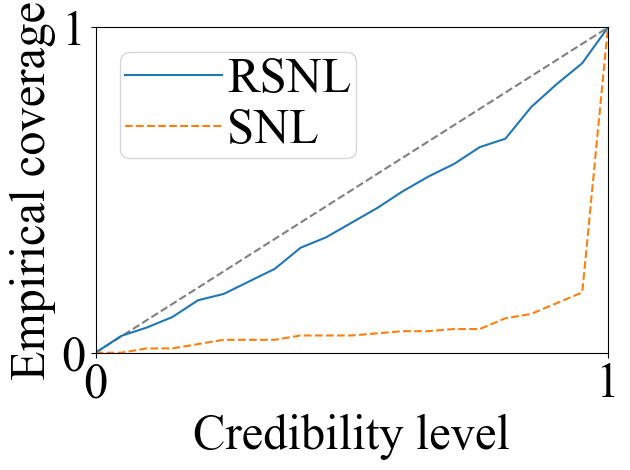

In [16]:
plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        # title="Contaminated normal"
                        folder_name='contaminated_normal_'
                        )

sub_dir:  ../res/misspec_ma1/rsnl/seed_156
true_theta_pdf:  [1.34906747]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-4.8915153   1.3431052   1.3286495   1.3049177   1.2737261   1.2343801
  1.1821605   1.1309178   1.0804712   1.0235165   0.97087157  0.91854036
  0.8575323   0.7838629   0.69350404  0.57513964  0.41384283  0.22675306
 -0.03805355 -0.5895841  -4.8915153 ]
coverage:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res/misspec_ma1/rsnl/seed_169
true_theta_pdf:  [1.2229889]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-7.018181    1.2240052   1.2161406   1.20229     1.1832267   1.1626081
  1.1401212   1.1132452   1.0834855   1.0422163   0.99465185  0.9334224
  0.85016394  0.7515031   0.64184827  0.514234    0.36610165  0.15130198
 -0.11336084 -0.690

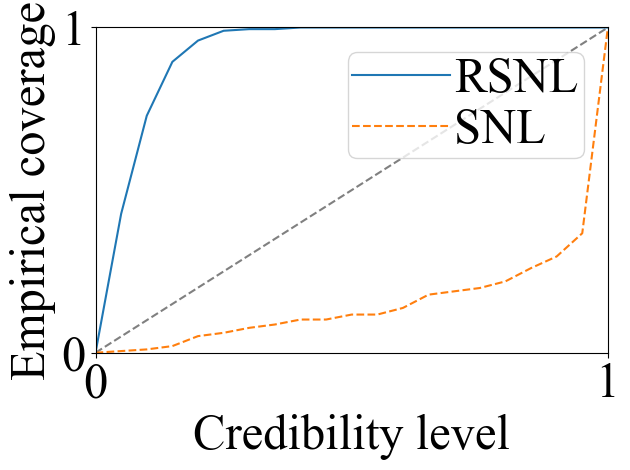

In [17]:
true_param = jnp.array([0.0])

directory = '../res/misspec_ma1/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/misspec_ma1/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        folder_name='misspec_ma1_'
                        )

In [18]:
# true_param = jnp.array([0.7, -2.9, -1.0, -0.9, 0.6])

# directory = '../res/contaminated_slcp/rsnl/'
# empirical_coverage_rsnl = calculate_coverage(directory, true_param)

# directory = '../res/contaminated_slcp/snl/'
# empirical_coverage_snl = calculate_coverage(directory, true_param)

# plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
#                         # title="Contaminated SLCP",
#                         folder_name='contaminated_slcp_'
#                         )

sub_dir:  ../res/sir/rsnl/seed_156
true_theta_pdf:  [7.57997207]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-3.8181806  8.140967   8.065838   7.984833   7.905901   7.8083515
  7.7129207  7.6172886  7.5293493  7.429985   7.321346   7.2249827
  7.098687   6.960667   6.809014   6.5914803  6.3535137  6.0643463
  5.617402   4.716801  -3.8181806]
coverage:  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
sub_dir:  ../res/sir/rsnl/seed_194
true_theta_pdf:  [10.33756445]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-112.229935    10.422003    10.349868    10.279508    10.21351
   10.134631    10.054462     9.963197     9.8761       9.779587
    9.669078     9.5652275    9.43775      9.289324     9.0863695
    8.848133     8.527757     8.120278     7.5092254    6.4211903
 -112.229

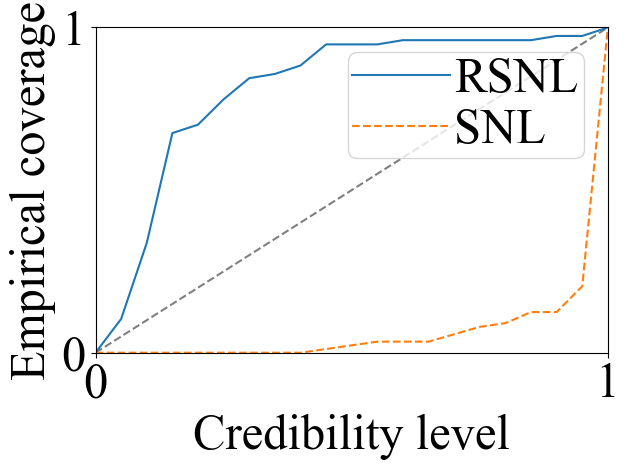

In [19]:
directory = '../res/sir/rsnl/'
true_param = jnp.array([.1, .15])
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/sir/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)
plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        folder_name='sir_'
                        # title="SIR"
                        )